In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("./R04_50")


In [3]:
dataset.drop(columns={"Unnamed: 0"}, inplace=True)

In [4]:
dataset.head()

,Fc5.,Fc3.,Fc1.,Fcz.,Fc2.,Fc4.,Fc6.,C5..,C3..,C1..,...,Po7.,Po3.,Poz.,Po4.,Po8.,O1..,Oz..,O2..,Iz..,label
0,-5.0,2.0,37.0,39.0,30.0,26.0,-16.0,-14.0,4.0,18.0,...,-8.0,-35.0,-45.0,-66.0,-39.0,-33.0,-48.0,-39.0,-39.0,0
1,-12.0,-24.0,1.0,-2.0,-15.0,-22.0,-55.0,-36.0,-27.0,-25.0,...,-40.0,-68.0,-65.0,-84.0,-52.0,-21.0,-42.0,-31.0,-34.0,0
2,-77.0,-78.0,-59.0,-65.0,-63.0,-55.0,-67.0,-88.0,-71.0,-65.0,...,-22.0,-50.0,-35.0,-48.0,-18.0,-20.0,-42.0,-29.0,-27.0,0
3,-66.0,-67.0,-50.0,-65.0,-60.0,-55.0,-68.0,-62.0,-53.0,-54.0,...,-60.0,-78.0,-64.0,-68.0,-41.0,-44.0,-62.0,-34.0,-43.0,0
4,-45.0,-55.0,-33.0,-53.0,-54.0,-63.0,-83.0,-52.0,-50.0,-53.0,...,-55.0,-70.0,-54.0,-63.0,-37.0,-60.0,-70.0,-34.0,-45.0,0


In [5]:
dataset.shape


(986000, 65)

In [6]:
data = dataset.iloc[: ,:32]
data['label'] = dataset['label']

In [7]:
from sklearn.model_selection import train_test_split
X = data.drop(columns={"label"})
Y = data['label']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train = np.array(X_train)
X_test = np.array(X_test)
scaler = StandardScaler()
X_train_scaled =  scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_reshaped = X_train_scaled.reshape(X_train.shape[0],X_train.shape[1],1)
X_test_reshaped = X_test_scaled.reshape(X_test.shape[0],X_test.shape[1],1)




In [8]:
train_accuracies = []

In [9]:
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(64, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(128,kernel_size=2,activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [10]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [11]:
epochs = 100
for epoch in range(epochs):
    print(f"epoch {epoch+1}/100")
    history = model.fit(X_train_reshaped, Y_train, epochs=1)  
    train_accuracies.append(history.history['acc'][0])



epoch 1/100
Train on 788800 samples
788800/788800 [==============================] - 88s 111us/sample - loss: 0.9840 - acc: 0.5264
epoch 2/100
Train on 788800 samples
788800/788800 [==============================] - 85s 107us/sample - loss: 0.9026 - acc: 0.5731
epoch 3/100
Train on 788800 samples
788800/788800 [==============================] - 85s 108us/sample - loss: 0.8564 - acc: 0.5986
epoch 4/100
Train on 788800 samples
788800/788800 [==============================] - 85s 108us/sample - loss: 0.8271 - acc: 0.6156
epoch 5/100
Train on 788800 samples
788800/788800 [==============================] - 85s 107us/sample - loss: 0.8059 - acc: 0.6270
epoch 6/100
Train on 788800 samples
788800/788800 [==============================] - 85s 108us/sample - loss: 0.7901 - acc: 0.6352
epoch 7/100
Train on 788800 samples
788800/788800 [==============================] - 85s 107us/sample - loss: 0.7774 - acc: 0.6417
epoch 8/100
Train on 788800 samples
788800/788800 [==============================] 

In [17]:
test_loss, test_accuracy = model.evaluate(X_test_reshaped, Y_test, verbose=0)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Loss: 0.7480
Test Accuracy: 0.6678


In [18]:
print(train_accuracies)

[0.526392, 0.57312244, 0.5985814, 0.615625, 0.62697136, 0.63522315, 0.641681, 0.6470385, 0.651946, 0.65528905, 0.6580185, 0.6606909, 0.66313004, 0.66526115, 0.6676483, 0.669787, 0.67072135, 0.67177737, 0.67366254, 0.67462474, 0.6758595, 0.67711204, 0.67743534, 0.6780984, 0.67875504, 0.68038666, 0.68121195, 0.6814072, 0.6820322, 0.68292594, 0.6835307, 0.6842077, 0.68434966, 0.6850368, 0.68555146, 0.68662524, 0.6863286, 0.6867013, 0.6867013, 0.68754566, 0.68759125, 0.68804765, 0.68838996, 0.68839884, 0.6887234, 0.68853194, 0.6891925, 0.68956137, 0.689981, 0.6900532, 0.68973124, 0.69073784, 0.6902802, 0.6905401, 0.69099647, 0.6906922, 0.69140595, 0.6915619, 0.69151497, 0.6915619, 0.6917419, 0.6920525, 0.6917584, 0.6924417, 0.69242394, 0.6920474, 0.69225407, 0.69260395, 0.6922414, 0.6930401, 0.692822, 0.6927485, 0.6925317, 0.6927143, 0.69257987, 0.6924886, 0.6924658, 0.69255704, 0.69265085, 0.693144, 0.692907, 0.6930819, 0.69281316, 0.6924696, 0.6924696, 0.6919663, 0.6923517, 0.6927713, 0.

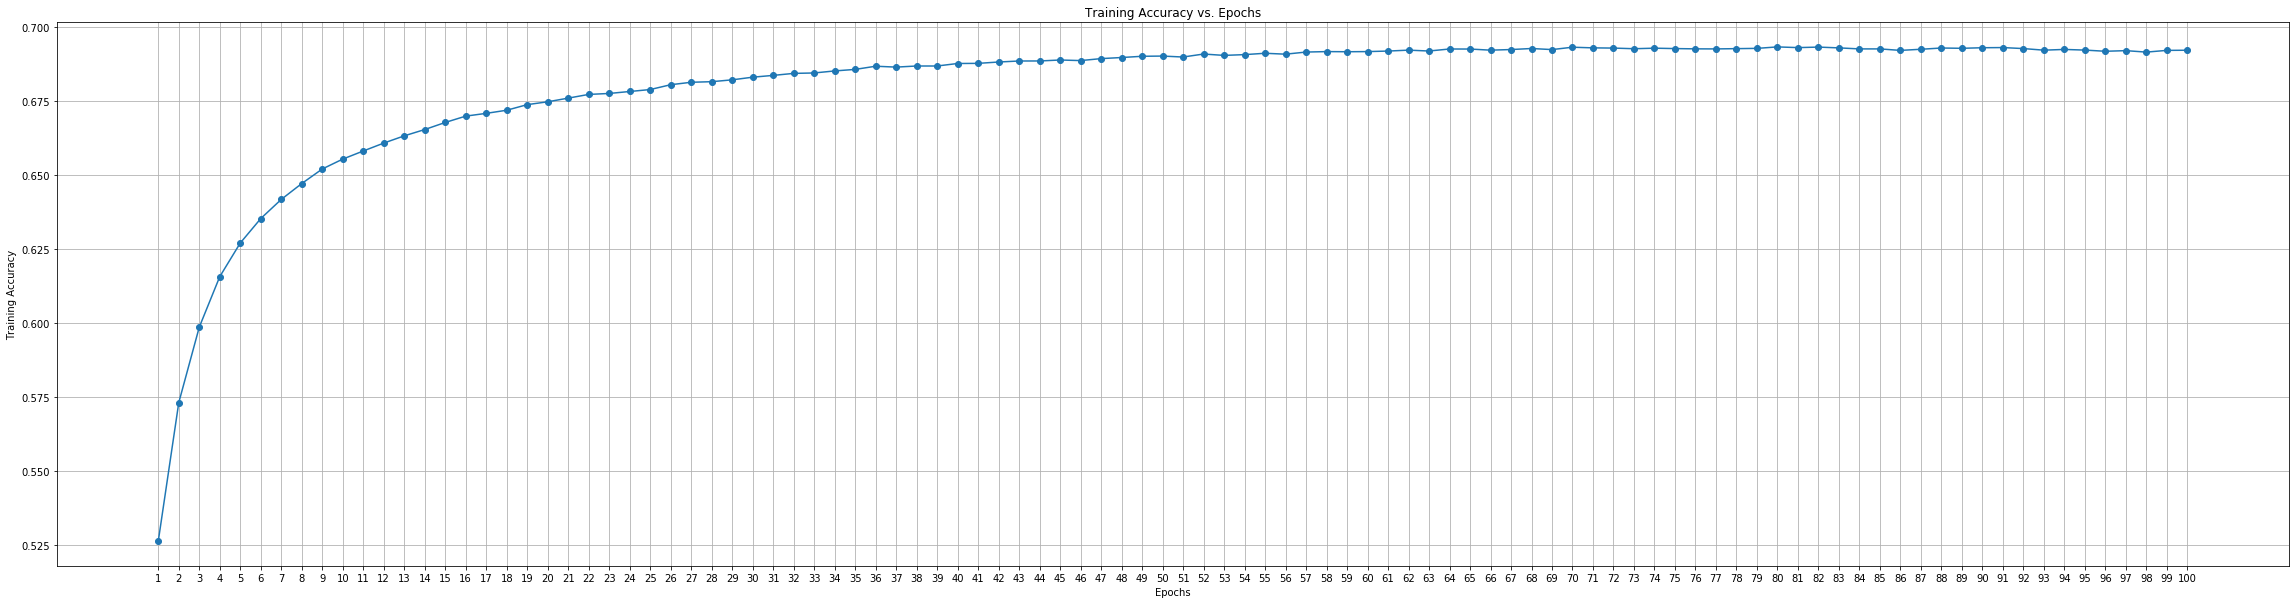

In [19]:
epochs_list = [i for i in range(1,epochs+1)]
plt.figure(figsize=(40,10))
plt.plot(epochs_list, train_accuracies, marker='o', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy vs. Epochs')
plt.grid(True)
plt.xticks(range(1, 101))

plt.show()

In [20]:
print(sum(train_accuracies))

67.99301618337631


In [21]:
print(max(train_accuracies))

0.693144
